# Librairies

In [1]:

import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx
import gzip
from tqdm import tqdm
import numpy as np

## Data

### LANE level - Data static detector 

In [2]:
# Open the gzip-compressed file
with gzip.open('raw/det_val_hr_2024_01.csv.gz', mode='rt') as gz_file:
    df = pd.read_csv(gz_file, delimiter = ';')

In [3]:
df

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr
0,100101010000167,01.01.2024,0,1.00,109,73,108,73,1,70
1,100101010000167,01.01.2024,1,1.00,370,73,370,73,0,-1
2,100101010000167,01.01.2024,2,1.00,385,74,385,74,0,-1
3,100101010000167,01.01.2024,3,1.00,246,74,245,74,1,69
4,100101010000167,01.01.2024,4,1.00,167,75,159,75,8,74
...,...,...,...,...,...,...,...,...,...,...
182608,100101010093228,31.01.2024,16,0.83,145,23,142,23,4,24
182609,100101010093228,31.01.2024,17,0.92,155,24,151,24,4,32
182610,100101010093228,31.01.2024,20,0.75,101,22,101,22,0,-1
182611,100101010093228,31.01.2024,22,0.83,130,24,126,24,4,24


In [4]:
# Create timestamps
l_time = []
for date, hour in df[['tag', 'stunde']].values :
    l_time.append(
        date + ' ' + str(hour)
         
    )
    
df['time'] = pd.to_datetime(l_time, format = '%d.%m.%Y %H')
df.set_index(['detid_15', 'time'], inplace=True)

Text(0.5, 1.0, 'Detector ID : 100101010000268')

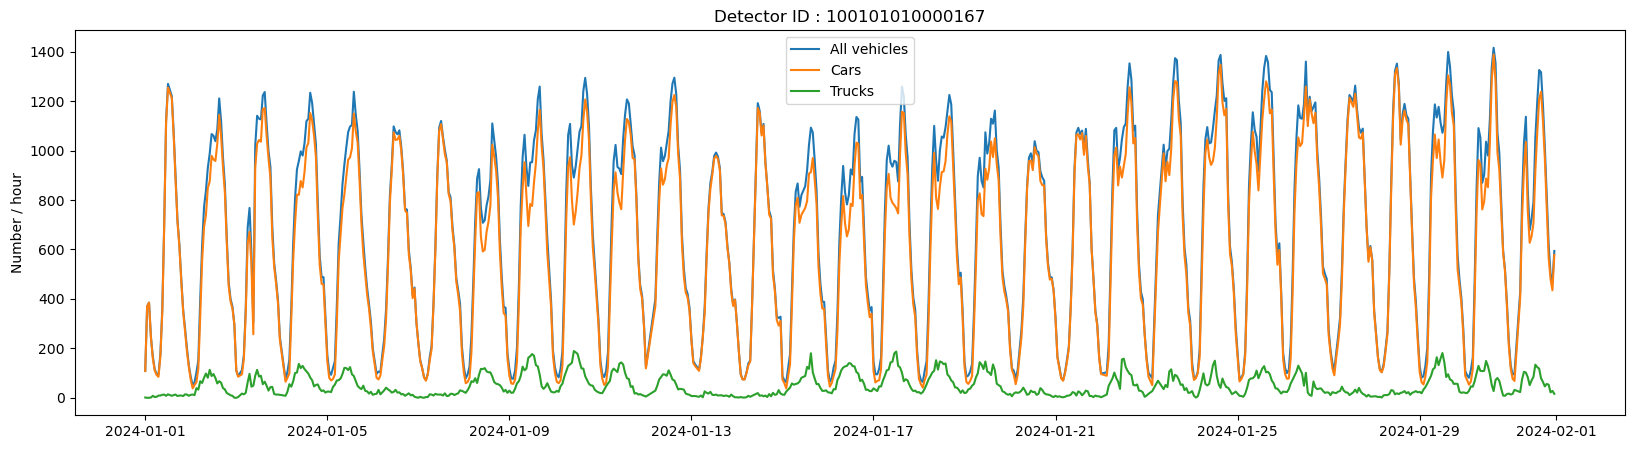

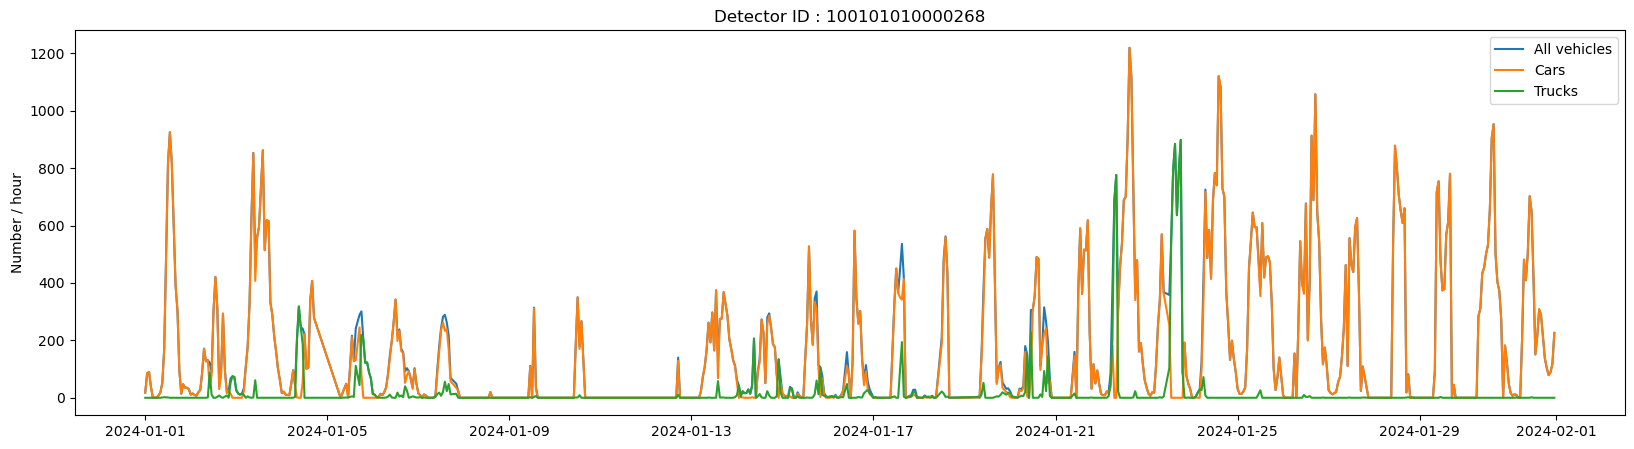

In [5]:
# Plot one sensor timeserie
idx = 100101010000167

plt.figure(figsize = (20,5))

plt.plot(df.loc[idx].q_kfz_det_hr, label = 'All vehicles')
plt.plot(df.loc[idx].q_pkw_det_hr, label = 'Cars')
plt.plot(df.loc[idx].q_lkw_det_hr, label = 'Trucks')

plt.legend()
plt.ylabel('Number / hour')
plt.title('Detector ID : '+str(idx))

idx = 100101010000268

plt.figure(figsize = (20,5))

plt.plot(df.loc[idx].q_kfz_det_hr, label = 'All vehicles')
plt.plot(df.loc[idx].q_pkw_det_hr, label = 'Cars')
plt.plot(df.loc[idx].q_lkw_det_hr, label = 'Trucks')

plt.legend()
plt.ylabel('Number / hour')
plt.title('Detector ID : '+str(idx))

Text(0.5, 1.0, 'Detector ID : 100101010000268')

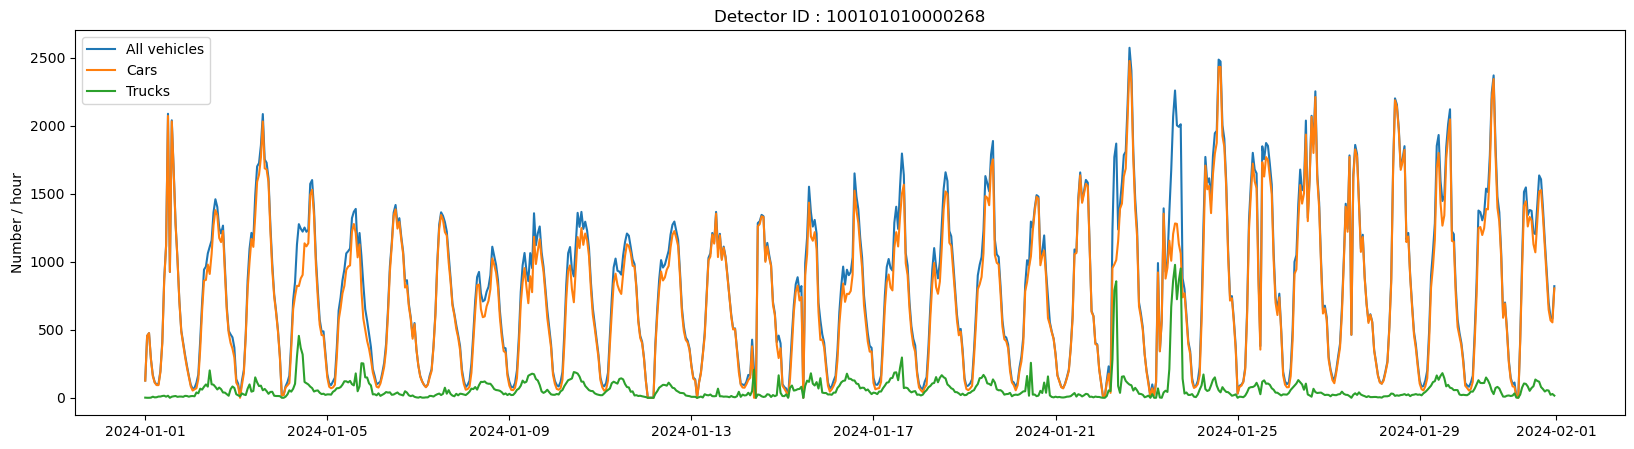

In [6]:
# Plot sum of both sensor
somme = df[['q_kfz_det_hr', 'q_pkw_det_hr', 'q_lkw_det_hr']].loc[100101010000167].reindex(df.index.levels[1]).fillna(0) + df[['q_kfz_det_hr', 'q_pkw_det_hr', 'q_lkw_det_hr']].loc[100101010000268].reindex(df.index.levels[1]).fillna(0)

plt.figure(figsize = (20,5))

plt.plot(somme.q_kfz_det_hr, label = 'All vehicles')
plt.plot(somme.q_pkw_det_hr, label = 'Cars')
plt.plot(somme.q_lkw_det_hr, label = 'Trucks')

plt.legend()
plt.ylabel('Number / hour')
plt.title('Detector ID : '+str(idx))

### ROAD level (sum of LANES) - Data Section 

In [7]:
# Open the gzip-compressed file
with gzip.open('raw/mq_hr_2024_01.csv.gz', mode='rt') as gz_file:
    df = pd.read_csv(gz_file, delimiter = ';')

In [8]:
df.columns

Index(['mq_name', 'tag', 'stunde', 'qualitaet', 'q_kfz_mq_hr', 'v_kfz_mq_hr',
       'q_pkw_mq_hr', 'v_pkw_mq_hr', 'q_lkw_mq_hr', 'v_lkw_mq_hr'],
      dtype='object')

In [9]:
# Create timestamps
l_time = []
for date, hour in df[['tag', 'stunde']].values :
    l_time.append(
        date + ' ' + str(hour)
         
    )
    
df['time'] = pd.to_datetime(l_time, format = '%d.%m.%Y %H')
df.set_index(['mq_name', 'time'], inplace=True)

In [10]:
df

tag  stunde  qualitaet  q_kfz_mq_hr  \
mq_name time                                                              
TE001   2024-01-01 00:00:00  01.01.2024       0        1.0          127   
        2024-01-01 01:00:00  01.01.2024       1        1.0          455   
        2024-01-01 02:00:00  01.01.2024       2        1.0          475   
        2024-01-01 03:00:00  01.01.2024       3        1.0          285   
        2024-01-01 04:00:00  01.01.2024       4        1.0          167   
...                                 ...     ...        ...          ...   
TE558   2024-01-31 16:00:00  31.01.2024      16        1.0          145   
        2024-01-31 17:00:00  31.01.2024      17        1.0          155   
        2024-01-31 20:00:00  31.01.2024      20        1.0          101   
        2024-01-31 22:00:00  31.01.2024      22        1.0          130   
        2024-01-31 23:00:00  31.01.2024      23        1.0           78   

                             v_kfz_mq_hr  q_pkw_mq_hr  v_pkw_mq_hr  \
mq_name time                                                         
TE001   2024-01-01 00:00:00           63          126           63   
        2024-01-01 01:00:00           60          455           60   
        2024-01-01 02:00:00           61          475           61   
        2024-01-01 03:00:00           64          284           64   
        2024-01-01 04:00:00           75          159           75   
...                                  ...          ...          ...   
TE558   2024-01-31 16:00:00           23          142           23   
        2024-01-31 17:00:00           24          151           24   
        2024-01-31 20:00:00           22          101           22   
        2024-01-31 22:00:00           24          126           24   
        2024-01-31 23:00:00           27           77           27   

                             q_lkw_mq_hr  v_lkw_mq_hr  
mq_name time                                           
TE001   2024-01-01 00:00:00            1           70  
        2024-01-01 01:00:00            0           -1  
        2024-01-01 02:00:00            0           -1  
        2024-01-01 03:00:00            1           69  
        2024-01-01 04:00:00            8           74  
...                                  ...          ...  
TE558   2024-01-31 16:00:00            4           24  
        2024-01-31 17:00:00            4           32  
        2024-01-31 20:00:00            0           -1  
        2024-01-31 22:00:00            4           24  
        2024-01-31 23:00:00            1           28  

[82700 rows x 9 columns]

Text(0.5, 1.0, 'Detector ID : TE001')

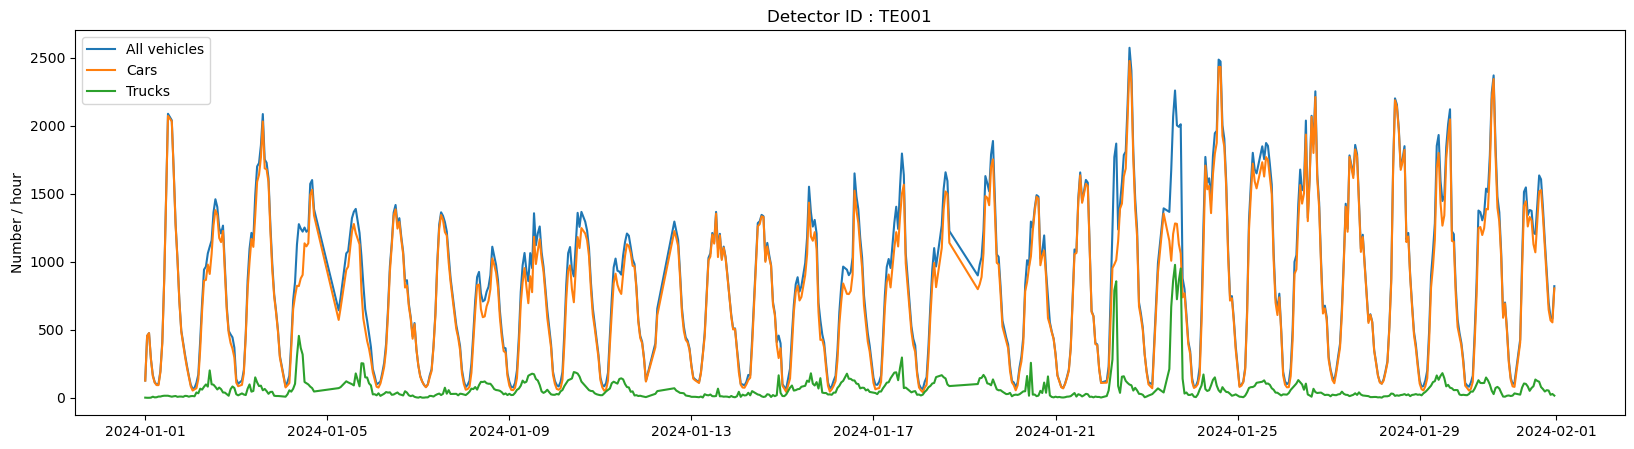

In [11]:
# This looks like the sum of both sensor we previously show
# We can proceed directly with this dataset
idx = 'TE001'

plt.figure(figsize = (20,5))

plt.plot(df.loc[idx].q_kfz_mq_hr, label = 'All vehicles')
plt.plot(df.loc[idx].q_pkw_mq_hr, label = 'Cars')
plt.plot(df.loc[idx].q_lkw_mq_hr, label = 'Trucks')

plt.legend()
plt.ylabel('Number / hour')
plt.title('Detector ID : '+idx)

In [12]:
# Remarks
# The combination of data from both sensor is clear but seem not perfect. 
# Where a value from a lane sensor is missing the sum is NaN, I don't know if we should consider the sum as a NaN or no
# This is if we want to take detector level data, join with master file, and then groupy .sum()
# The other approach would be to use section data directly

In [13]:
df

tag  stunde  qualitaet  q_kfz_mq_hr  \
mq_name time                                                              
TE001   2024-01-01 00:00:00  01.01.2024       0        1.0          127   
        2024-01-01 01:00:00  01.01.2024       1        1.0          455   
        2024-01-01 02:00:00  01.01.2024       2        1.0          475   
        2024-01-01 03:00:00  01.01.2024       3        1.0          285   
        2024-01-01 04:00:00  01.01.2024       4        1.0          167   
...                                 ...     ...        ...          ...   
TE558   2024-01-31 16:00:00  31.01.2024      16        1.0          145   
        2024-01-31 17:00:00  31.01.2024      17        1.0          155   
        2024-01-31 20:00:00  31.01.2024      20        1.0          101   
        2024-01-31 22:00:00  31.01.2024      22        1.0          130   
        2024-01-31 23:00:00  31.01.2024      23        1.0           78   

                             v_kfz_mq_hr  q_pkw_mq_hr  v_pkw_mq_hr  \
mq_name time                                                         
TE001   2024-01-01 00:00:00           63          126           63   
        2024-01-01 01:00:00           60          455           60   
        2024-01-01 02:00:00           61          475           61   
        2024-01-01 03:00:00           64          284           64   
        2024-01-01 04:00:00           75          159           75   
...                                  ...          ...          ...   
TE558   2024-01-31 16:00:00           23          142           23   
        2024-01-31 17:00:00           24          151           24   
        2024-01-31 20:00:00           22          101           22   
        2024-01-31 22:00:00           24          126           24   
        2024-01-31 23:00:00           27           77           27   

                             q_lkw_mq_hr  v_lkw_mq_hr  
mq_name time                                           
TE001   2024-01-01 00:00:00            1           70  
        2024-01-01 01:00:00            0           -1  
        2024-01-01 02:00:00            0           -1  
        2024-01-01 03:00:00            1           69  
        2024-01-01 04:00:00            8           74  
...                                  ...          ...  
TE558   2024-01-31 16:00:00            4           24  
        2024-01-31 17:00:00            4           32  
        2024-01-31 20:00:00            0           -1  
        2024-01-31 22:00:00            4           24  
        2024-01-31 23:00:00            1           28  

[82700 rows x 9 columns]

In [14]:
# Read entire year
year = 2023
l_df = []
# December is not yet available
for month in tqdm(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']):

    # Open the gzip-compressed file
    with gzip.open(f'raw/mq_hr_{year}_{month}.csv.gz', mode='rt') as gz_file:
        df = pd.read_csv(gz_file, delimiter = ';')
        
        
    # Create timestamps with hours
    l_time = []
    for date, hour in df[['tag', 'stunde']].values :
        l_time.append(
            date + ' ' + str(hour)
            
        )
        
    df['time'] = pd.to_datetime(l_time, format = '%d.%m.%Y %H')
    df.set_index(['mq_name', 'time'], inplace=True)
    l_df.append(df)

    # # Old method (without hours)
    # df['time'] = pd.to_datetime(df.tag, format = '%d.%m.%Y ')
    # df.set_index(['mq_name', 'time'], inplace=True)
    # l_df.append(df)
    
df = pd.concat(l_df)
l_df = None

100%|██████████| 11/11 [00:04<00:00,  2.36it/s]


In [15]:
df.head() # Negative values are invalid

tag  stunde  qualitaet  q_kfz_mq_hr  \
mq_name time                                                              
TE001   2023-01-02 13:00:00  02.01.2023      13        1.0         2134   
        2023-01-02 14:00:00  02.01.2023      14        1.0         2349   
        2023-01-02 15:00:00  02.01.2023      15        1.0         2325   
        2023-01-02 16:00:00  02.01.2023      16        1.0         1846   
        2023-01-02 17:00:00  02.01.2023      17        1.0         1276   

                             v_kfz_mq_hr  q_pkw_mq_hr  v_pkw_mq_hr  \
mq_name time                                                         
TE001   2023-01-02 13:00:00           83         2037           83   
        2023-01-02 14:00:00           67         2299           67   
        2023-01-02 15:00:00           62         2288           62   
        2023-01-02 16:00:00           65         1752           64   
        2023-01-02 17:00:00           73         1179           73   

                             q_lkw_mq_hr  v_lkw_mq_hr  
mq_name time                                           
TE001   2023-01-02 13:00:00           97           71  
        2023-01-02 14:00:00           50           60  
        2023-01-02 15:00:00           37           63  
        2023-01-02 16:00:00           94           74  
        2023-01-02 17:00:00           97           76

Text(0, 0.5, 'Flow (vehicle/hour)')

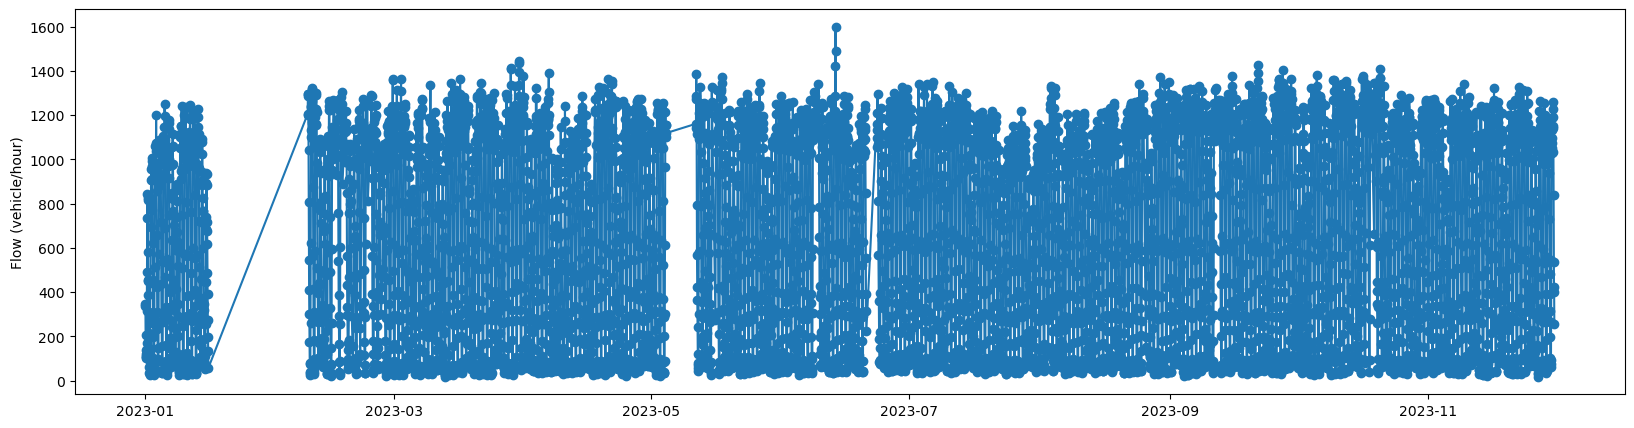

In [16]:
plt.figure(figsize = (20,5))
plt.scatter(df.loc['TE005'].index, df.loc['TE005']['q_kfz_mq_hr'])

plt.plot(df.loc['TE005']['q_kfz_mq_hr'])

# plt.xlim(
#     pd.to_datetime('2023-06-17'),
#     pd.to_datetime('2023-07-02')
# )
plt.ylabel('Flow (vehicle/hour)')

# there are lots of missing data in some cases

In [17]:
df.drop(['stunde',	'qualitaet', 'tag'], axis=1, inplace=True)

In [18]:
df.describe().min()

q_kfz_mq_hr    0.0
v_kfz_mq_hr   -1.0
q_pkw_mq_hr    0.0
v_pkw_mq_hr   -1.0
q_lkw_mq_hr    0.0
v_lkw_mq_hr   -1.0
dtype: float64

In [19]:
# Transform negative values as NaN
for c in ['v_kfz_mq_hr' , 'v_pkw_mq_hr', 'v_lkw_mq_hr'] :
    df.loc[df[c] < 0, c] = np.nan

In [20]:
df

q_kfz_mq_hr  v_kfz_mq_hr  q_pkw_mq_hr  \
mq_name time                                                         
TE001   2023-01-02 13:00:00         2134         83.0         2037   
        2023-01-02 14:00:00         2349         67.0         2299   
        2023-01-02 15:00:00         2325         62.0         2288   
        2023-01-02 16:00:00         1846         65.0         1752   
        2023-01-02 17:00:00         1276         73.0         1179   
...                                  ...          ...          ...   
TE558   2023-11-30 19:00:00          156         27.0          151   
        2023-11-30 20:00:00          106         29.0          103   
        2023-11-30 21:00:00          118         30.0          116   
        2023-11-30 22:00:00          120         29.0          113   
        2023-11-30 23:00:00          110         32.0          106   

                             v_pkw_mq_hr  q_lkw_mq_hr  v_lkw_mq_hr  
mq_name time                                                        
TE001   2023-01-02 13:00:00         83.0           97         71.0  
        2023-01-02 14:00:00         67.0           50         60.0  
        2023-01-02 15:00:00         62.0           37         63.0  
        2023-01-02 16:00:00         64.0           94         74.0  
        2023-01-02 17:00:00         73.0           97         76.0  
...                                  ...          ...          ...  
TE558   2023-11-30 19:00:00         27.0            3         28.0  
        2023-11-30 20:00:00         30.0            3         24.0  
        2023-11-30 21:00:00         30.0            2         37.0  
        2023-11-30 22:00:00         29.0            7         29.0  
        2023-11-30 23:00:00         32.0            2         28.0  

[1393428 rows x 6 columns]

In [21]:
counts_name = ['flow', 'flow_cars', 'flow_trucks']
speeds_name = {
    'average_speed':'flow',
    'speed_cars':'flow_cars',
    'speed_trucks':'flow_trucks'
}

In [22]:
df.rename(columns = {
    'q_kfz_mq_hr' : 'flow',
    'v_kfz_mq_hr' : 'average_speed',
    'q_pkw_mq_hr' :  'flow_cars' ,
    'v_pkw_mq_hr' :  'speed_cars' ,
    'q_lkw_mq_hr' : 'flow_trucks' ,
    'v_lkw_mq_hr' : 'speed_trucks' 
}
    , inplace=True)

In [23]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from temporal_agg import hourly_to_aadt

In [24]:
df, daily_capture_rate, hourly_capture_rate = hourly_to_aadt(df,
                    sensor_id_name = 'mq_name',
                    time_name = 'time',
                    counts_name = counts_name,
                    speeds_name = speeds_name,
                    )

Hourly capture rate is 75.3 %
Daily capture rate is 74.2 %


In [25]:
df.rename(columns = {
    'flow' : 'AADT',
    'flow_trucks' : 'TR_AADT',
    'flow_AAWT' : 'AAWT',
    'flow_trucks_AAWT' : 'TR_AAWT',
    'average_speed' : 'savg',
    'speed_trucks' : 'TR_savg'
}
  , inplace=True  
) 

df = df[['AADT', 'TR_AADT', 'AAWT', 'TR_AAWT', 'savg', 'TR_savg']]

In [26]:
df

,AADT,TR_AADT,AAWT,TR_AAWT,savg,TR_savg
mq_name,,,,,,
TE001,26599.872075,1611.476055,27880.463564,2052.974600,47.208352,64.988693
TE002,31198.585145,2359.702893,32925.577070,2885.109413,70.057310,71.047550
TE004,7998.597701,1404.903736,8832.569672,1627.088115,42.677590,43.202229
TE005,15596.817731,2262.603683,16883.862488,2457.964672,44.036385,44.417571
TE006,5987.328491,666.047924,6391.310420,740.634332,41.590768,41.704258
...,...,...,...,...,...,...
TE554,3708.774990,81.658078,3771.629514,96.906598,36.483528,35.892911
TE556,7723.360404,249.697982,8096.985821,287.955689,30.766166,30.950192
TE557,6303.100340,251.594388,6673.806763,286.124396,27.242070,26.728505


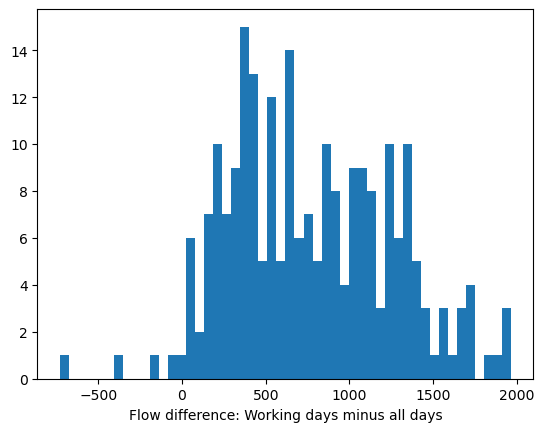

In [27]:
# Some roads are more busy during the weekends (negative values)
plt.hist((df.AAWT - df.AADT), bins = 50)
plt.xlabel('Flow difference: Working days minus all days')
plt.show()

## Ref

In [28]:
ref = pd.read_excel('raw/Stammdaten_Verkehrsdetektion_2022_07_20(1).xlsx')

In [29]:
ref = gpd.GeoDataFrame(
    ref, 
    geometry = gpd.points_from_xy(ref['LÄNGE (WGS84)'], ref['BREITE (WGS84)']),
    crs = 'epsg:4326'
)

In [30]:
ref.columns

Index(['MQ_KURZNAME', 'DET_NAME_ALT', 'DET_NAME_NEU', 'DET_ID15', 'MQ_ID15',
       'STRASSE', 'POSITION', 'POS_DETAIL', 'RICHTUNG', 'SPUR', 'annotation',
       'LÄNGE (WGS84)', 'BREITE (WGS84)', 'INBETRIEBNAHME', 'ABBAUDATUM',
       'DEINSTALLIERT', 'KOMMENTAR', 'geometry'],
      dtype='object')

In [31]:
# is NAME an ID ? 
ref['MQ_KURZNAME'].unique().size == ref['MQ_ID15'].unique().size

True

In [32]:
print('Number of section', ref['MQ_KURZNAME'].unique().size )
print('Number of detector', ref['DET_ID15'].unique().size )
print('Number of longitude', ref['LÄNGE (WGS84)'].unique().size )
print('Number of latitude', ref['BREITE (WGS84)'].unique().size )

Number of section 292
Number of detector 548
Number of longitude 284
Number of latitude 284


In [33]:
# Remove duplicated sections
ref = ref.drop_duplicates(subset=['MQ_KURZNAME']).reset_index(drop=True)

In [34]:
# Datetime are not JSON serilazble
ref.dtypes

MQ_KURZNAME               object
DET_NAME_ALT              object
DET_NAME_NEU              object
DET_ID15                   int64
MQ_ID15                    int64
STRASSE                   object
POSITION                  object
POS_DETAIL                object
RICHTUNG                  object
SPUR                      object
annotation                object
LÄNGE (WGS84)            float64
BREITE (WGS84)           float64
INBETRIEBNAHME    datetime64[ns]
ABBAUDATUM        datetime64[ns]
DEINSTALLIERT             object
KOMMENTAR                 object
geometry                geometry
dtype: object

(13.007469177246096, 13.71086863283905, 52.375963899305006, 52.69656914472978)

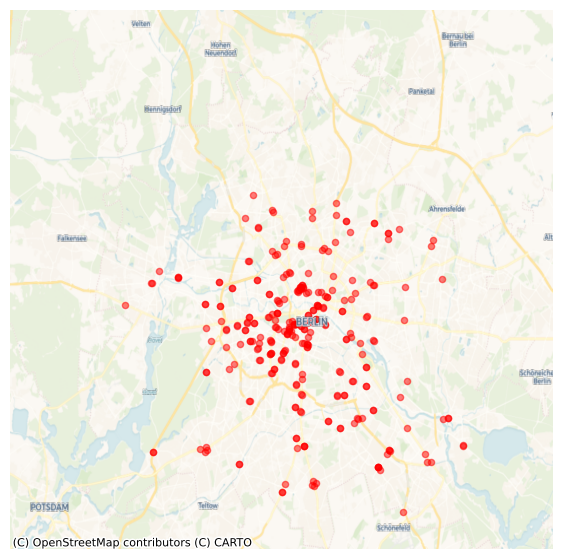

In [35]:
# Plot sensors
ax = ref.plot(color = 'r', markersize = 20, alpha = .5, figsize = (7,7))
# Add context in backround
cx.add_basemap(ax, crs = ref.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = ref.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')
plt.axis('auto')

In [36]:
ref.columns = [
    "MQ_ShortName",          # MQ_KURZNAME (Measurement Point Short Name)
    "Old_Name",              # DET_NAME_ALT (Old Detector Name)
    "New_Name",              # DET_NAME_NEU (New Detector Name)
    "Detector_ID15",         # DET_ID15 (Detector ID 15 digits)
    "MQ_ID15",               # MQ_ID15 (Measurement Point ID 15 digits)
    "raw_name",                # STRASSE (Street)
    "Position",              # POSITION (Position)
    "Position_Detail",       # POS_DETAIL (Detailed Position)
    "raw_direction",             # RICHTUNG (Direction)
    "Lane",                  # SPUR (Lane)
    "Annotation",            # annotation (Annotation/Notes)
    "Longitude (WGS84)",     # LÄNGE (WGS84) (Longitude in WGS84 format)
    "Latitude (WGS84)",      # BREITE (WGS84) (Latitude in WGS84 format)
    "Start_of_Operation",    # INBETRIEBNAHME (Date of Start of Operation)
    "Decommission_Date",     # ABBAUDATUM (Date of Removal/Decommission)
    "Deinstalled",           # DEINSTALLIERT (Flag for Deinstallation)
    "Comment",               # KOMMENTAR (Comments)
    "geometry"               # geometry (Geographical Data)
]

In [37]:
ref.Lane.value_counts()

Lane
HF_R       252
HF_2vR      11
BUS         11
HF           9
LA           3
HF_3vR       2
Park         1
AbL_R        1
ZuL_R        1
BUS_LKW      1
Name: count, dtype: int64

## Join

In [38]:
# We join on the section dataframe because our target data is at this level

In [39]:
# Join with average hourly flow
jf = df.join(
    ref[['MQ_ShortName', 'raw_name', 'raw_direction', 'geometry']].rename(columns = {'MQ_ShortName':'mq_name'}).set_index('mq_name'),
    on = 'mq_name',
    how = 'inner'
)

In [40]:
jf

,AADT,TR_AADT,AAWT,TR_AAWT,savg,TR_savg,raw_name,raw_direction,geometry
mq_name,,,,,,,,,
TE001,26599.872075,1611.476055,27880.463564,2052.974600,47.208352,64.988693,A115,Südwest,POINT (13.19258 52.43387)
TE002,31198.585145,2359.702893,32925.577070,2885.109413,70.057310,71.047550,A115,Nordost,POINT (13.19275 52.43381)
TE004,7998.597701,1404.903736,8832.569672,1627.088115,42.677590,43.202229,Clayallee,Süd,POINT (13.2613 52.43664)
TE005,15596.817731,2262.603683,16883.862488,2457.964672,44.036385,44.417571,Berliner Straße,West,POINT (13.26311 52.43511)
TE006,5987.328491,666.047924,6391.310420,740.634332,41.590768,41.704258,Teltower Damm,Nord,POINT (13.25988 52.43374)
...,...,...,...,...,...,...,...,...,...
TE554,3708.774990,81.658078,3771.629514,96.906598,36.483528,35.892911,Invalidenstraße,West,POINT (13.3811 52.53007)
TE556,7723.360404,249.697982,8096.985821,287.955689,30.766166,30.950192,Invalidenstraße,West,POINT (13.3846 52.53101)
TE557,6303.100340,251.594388,6673.806763,286.124396,27.242070,26.728505,Invalidenstraße,Ost,POINT (13.3844 52.53087)


# Map matching with OSM

In [41]:
from map_matching_OSM import points_matching

In [42]:
jf = gpd.GeoDataFrame(jf,
                      geometry = 'geometry',
                      crs = 'epsg:4326')

In [43]:
jf = points_matching(jf)

City downloaded


 38%|███▊      | 82/215 [00:01<00:01, 72.95it/s]

Value Error - No roads found nearby current index


 90%|████████▉ | 193/215 [00:03<00:00, 39.62it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 98%|█████████▊| 210/215 [00:03<00:00, 39.14it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


100%|██████████| 215/215 [00:03<00:00, 58.23it/s]


We failed to match 5 sensors
...on a total of 215 sensors


In [44]:
(jf.raw_name == jf.osm_name).sum()

193

In [45]:
jf[['raw_name', 'osm_name']].drop_duplicates()[:20]

,raw_name,osm_name
mq_name,,
TE001,A115,NaN
TE004,Clayallee,Clayallee
TE005,Berliner Straße,Berliner Straße
TE006,Teltower Damm,Teltower Damm
TE009,Großbeerenstraße,Großbeerenstraße
TE010,Marienfelder Allee,Marienfelder Allee
TE012,Mariendorfer Damm,Mariendorfer Damm
TE013,Lichtenrader Damm,Lichtenrader Damm
TE017,Buschkrugallee,Buschkrugallee


# Final saving

In [46]:
jf['raw_oneway'] = True

In [47]:
gpd.GeoDataFrame(jf, geometry = 'geometry', crs = 'epsg:4326').to_file(
    f'treated/Berlin_AADT_AAWT_{year}.geojson', index = False
)